In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.animation as animation
%matplotlib inline

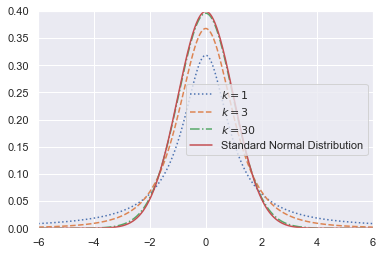

In [2]:
sns.set()

x = np.linspace(-6, 6, 1000)
fig,ax = plt.subplots(1,1)
 
linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 3, 30]
for k, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.t.pdf(x, k), linestyle=ls, label=r'$k=%i$' % k)
 
ax.plot(x, stats.norm.pdf(x, 0, 1), linestyle='-', label="Standard Normal Distribution")
 
plt.xlim(-6, 6)
plt.ylim(0, 0.4)
 
plt.legend()
plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


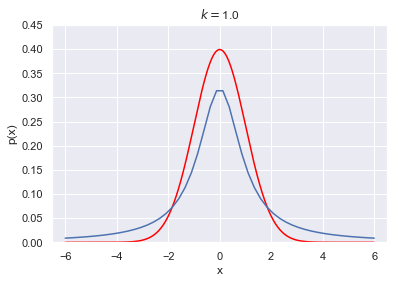

In [3]:
sns.set()

fig,ax = plt.subplots(1,1)
ax.set_xlim(-6.5, 6.5)
ax.set_ylim(0, 0.45)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

ax.plot(x, stats.norm.pdf(x, 0, 1), linestyle='-', label="Standard Normal Distribution", color='red')

def update(num,x,y,df,lines):
    if len(lines) > 0:
        lines.pop().remove()
    y_ = stats.t.pdf(x, df[num])
    line, = ax.plot(x, y_,c="b")
    lines.append(line)
    df_ = r'$k=%i$'
    ax.set_title(df_ + str(df[num])[:4])

x = np.linspace(-6, 6, 50)
df = np.linspace(1, 240, 240)
y = stats.t.pdf(x, 1)

lines = []

ani = animation.FuncAnimation(fig, update, fargs=(x,y,df,lines), interval=100, frames=50)
ani.save('anim2.gif', writer="imagemagick")